In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv",sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**1.数据处理**


1.1 缺失值处理

In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.isnull().values.any()

False

1.2 重复值处理

In [6]:
df.duplicated().sum()

0

1.3 处理年龄列的值

由于年龄以天为单位，在此转换为以年为单位的年龄

In [7]:
df['age'].head()

0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

In [8]:
df['age']=(df['age']/365).round()
df['age'].head()

0    50.0
1    55.0
2    52.0
3    48.0
4    48.0
Name: age, dtype: float64

1.4 判断患者性别

由于患者性别列的值1或2代表何种性别未知，通过计算平均吸烟量、平均身高、平均饮酒量判断性别

In [9]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [10]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [11]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

发现类别2在平均吸烟量、平均身高、平均饮酒量均高于类别1，故根据常识判断类别2代表男性，类别1代表女性

1.5 异常值处理

In [12]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


发现高压和低压均存在异常值，现进行处理控制血压的最高和最低值。

In [13]:
df = df[(df['ap_hi'] >= 0) & (df['ap_hi'] <= 300) & (df['ap_lo'] >= 0) & (df['ap_lo'] <= 300)]  
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000,68999.000000
mean,49968.513355,53.324932,1.348715,164.359759,74.118574,126.322497,81.333976,1.364382,1.225858,0.087871,0.053595,0.803287,0.494877
std,28847.212352,6.767977,0.476567,8.204275,14.328439,17.708323,9.872897,0.678699,0.571812,0.283109,0.225218,0.397516,0.499977
min,0.000000,30.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50007.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74861.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


2.可视化分析

2.1 年龄与心血管疾病的关系

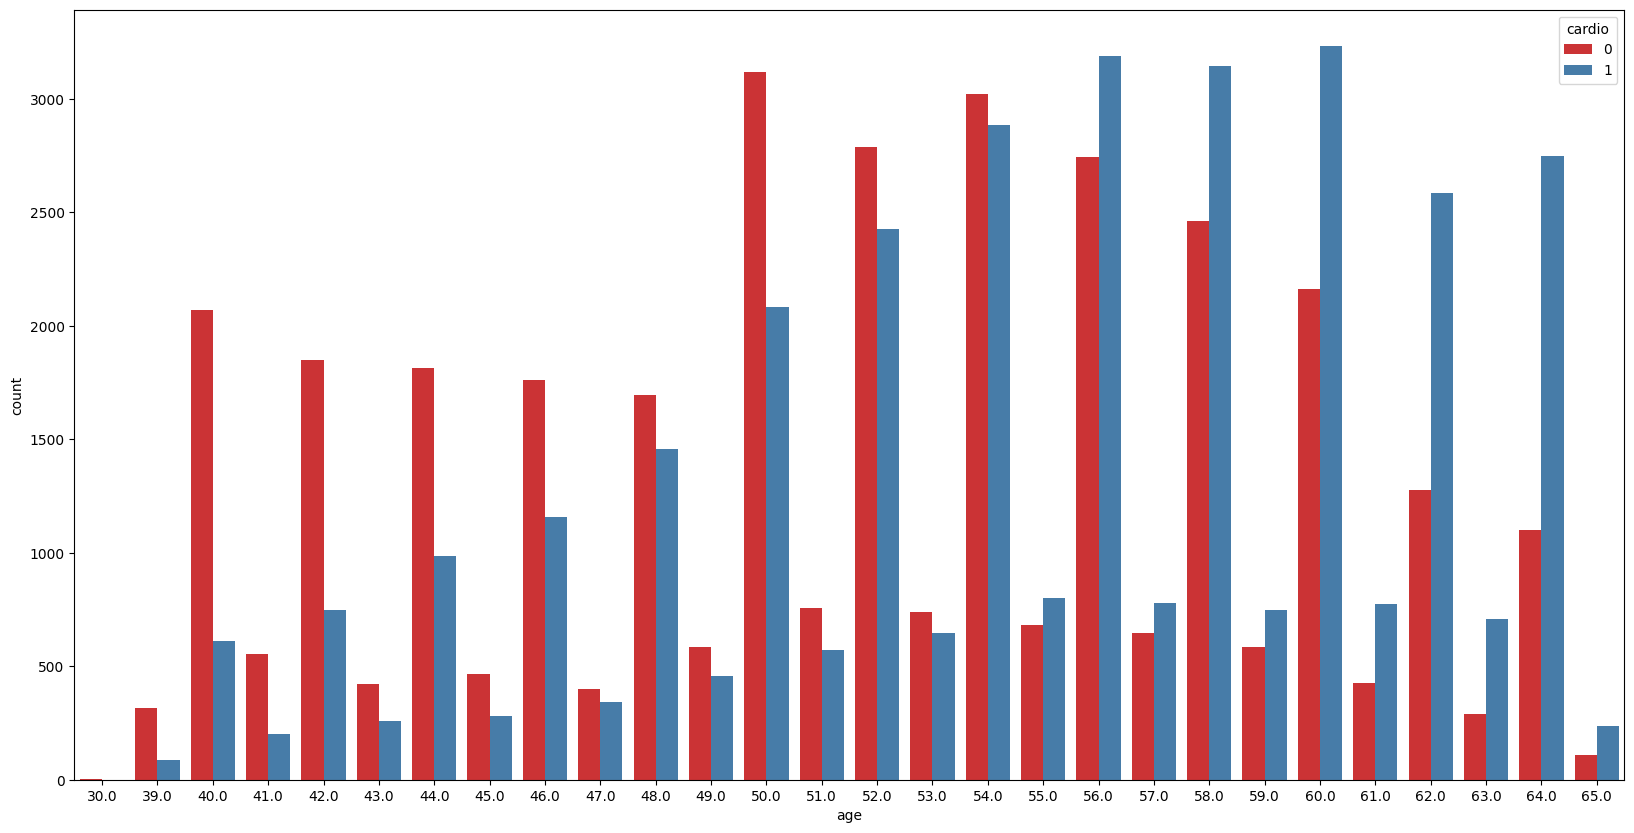

In [14]:
sns.countplot(x='age', hue='cardio', data = df, palette="Set1");

可知，在老年人中，心血管疾病的发病率有所增加。随着年龄增长,血管组织会出现有不同程度的生理性衰退，老年人是心血管疾病发病的高危人群。

2.2 性别对心血管疾病的影响

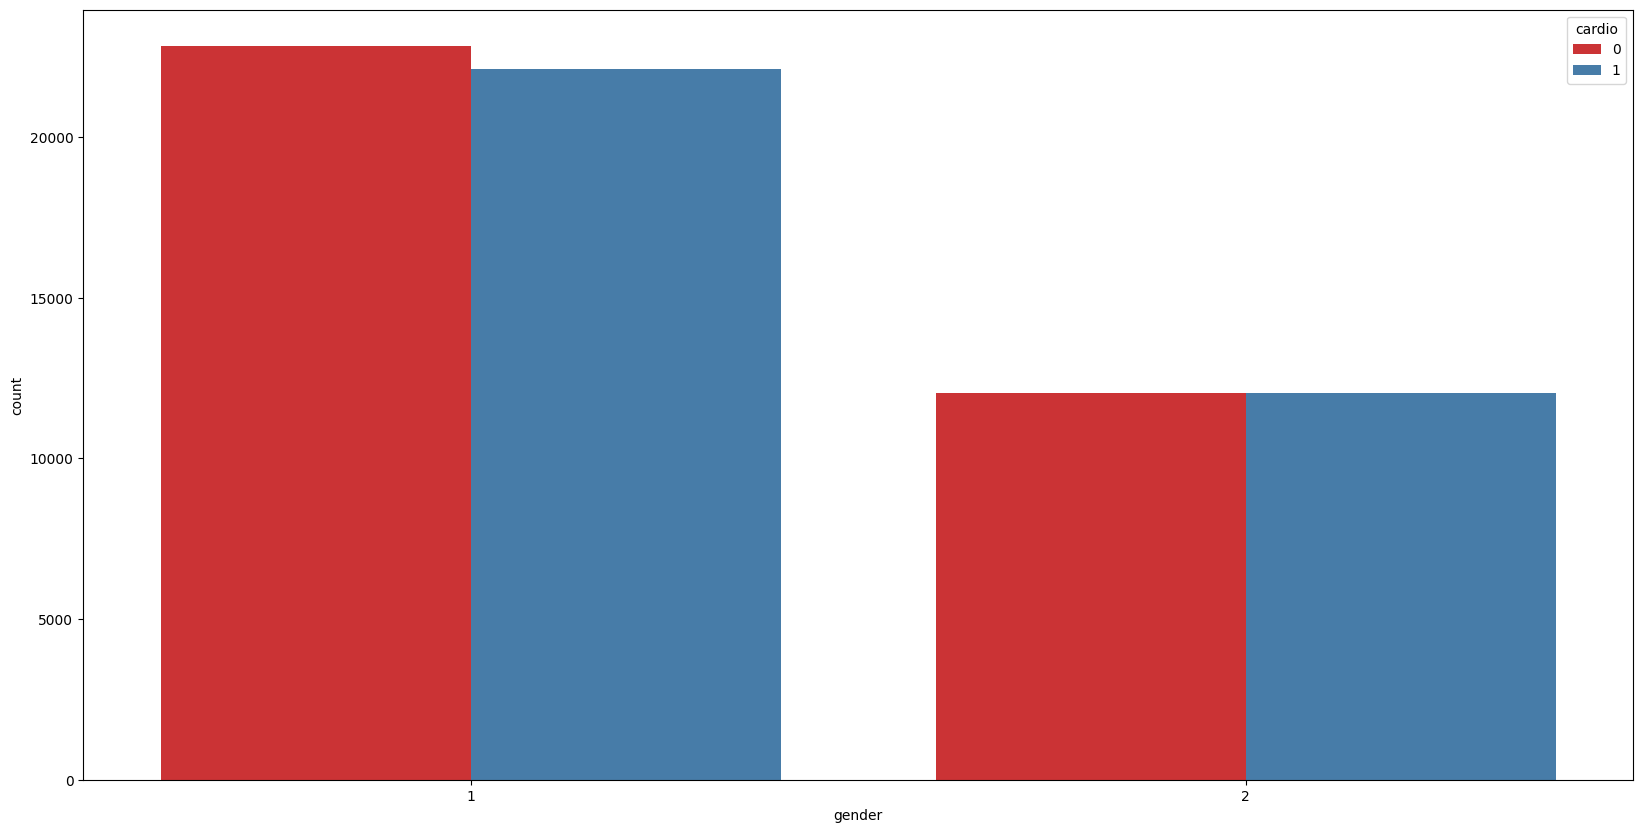

In [15]:
sns.countplot(x='gender', hue='cardio', data = df, palette="Set1");

可以看出性别对患心血管疾病基本无影响

2.3 身高对心血管疾病的影响

<Axes: xlabel='height', ylabel='Density'>

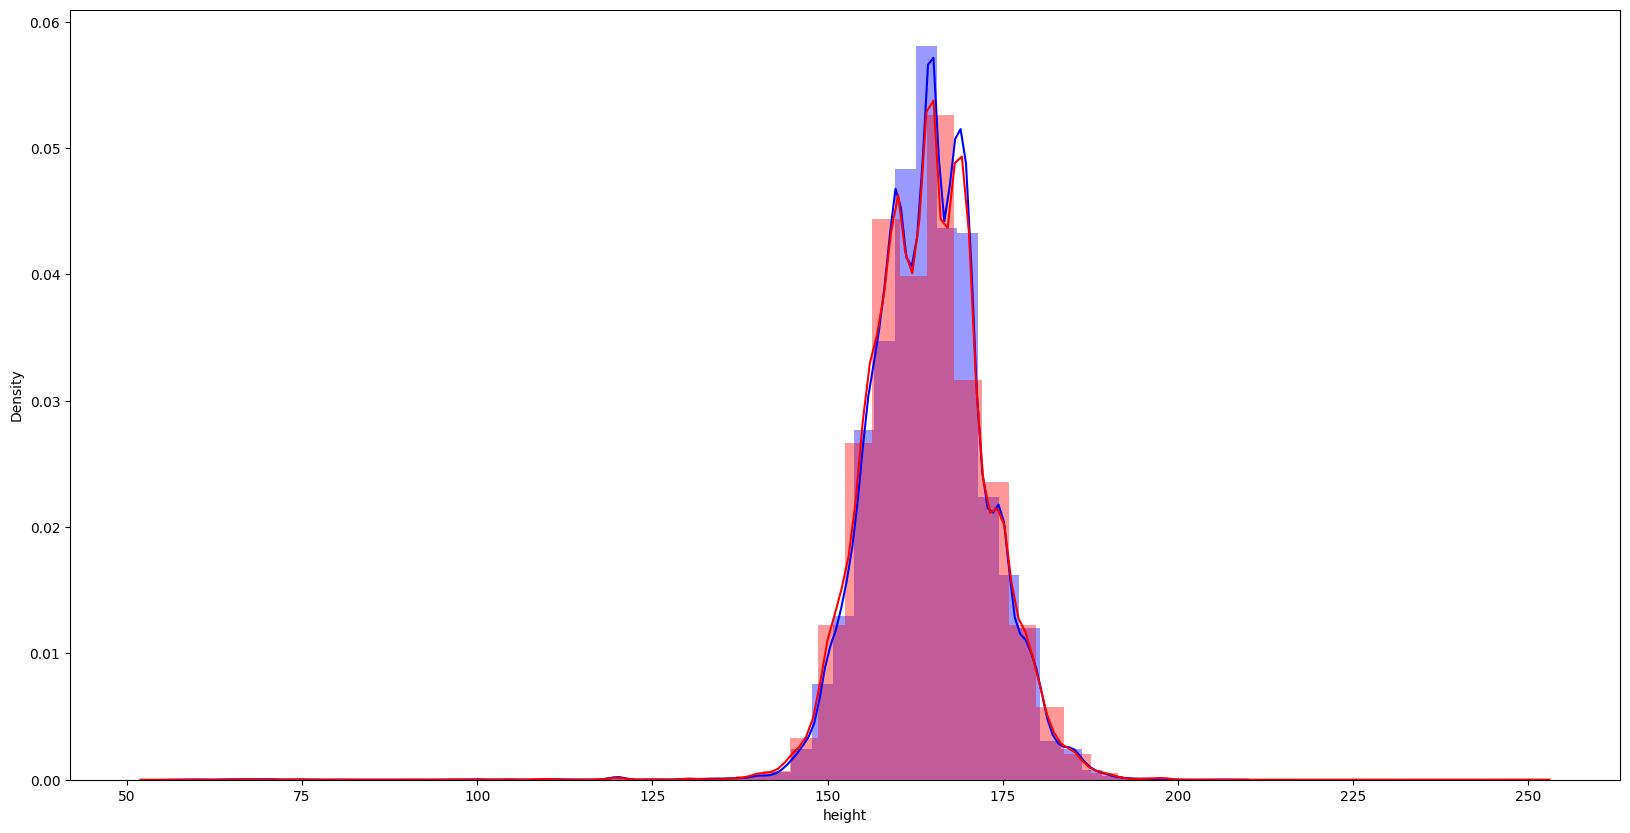

In [16]:
sns.distplot(df['height'][df['cardio']==0],color='blue')
sns.distplot(df['height'][df['cardio']==1],color='red')

蓝色代表无心血管疾病，红色代表有心血管疾病，可以看出身高对是否患心血管疾病基本无影响

2.4 体重对心血管疾病的影响

<Axes: xlabel='weight', ylabel='Density'>

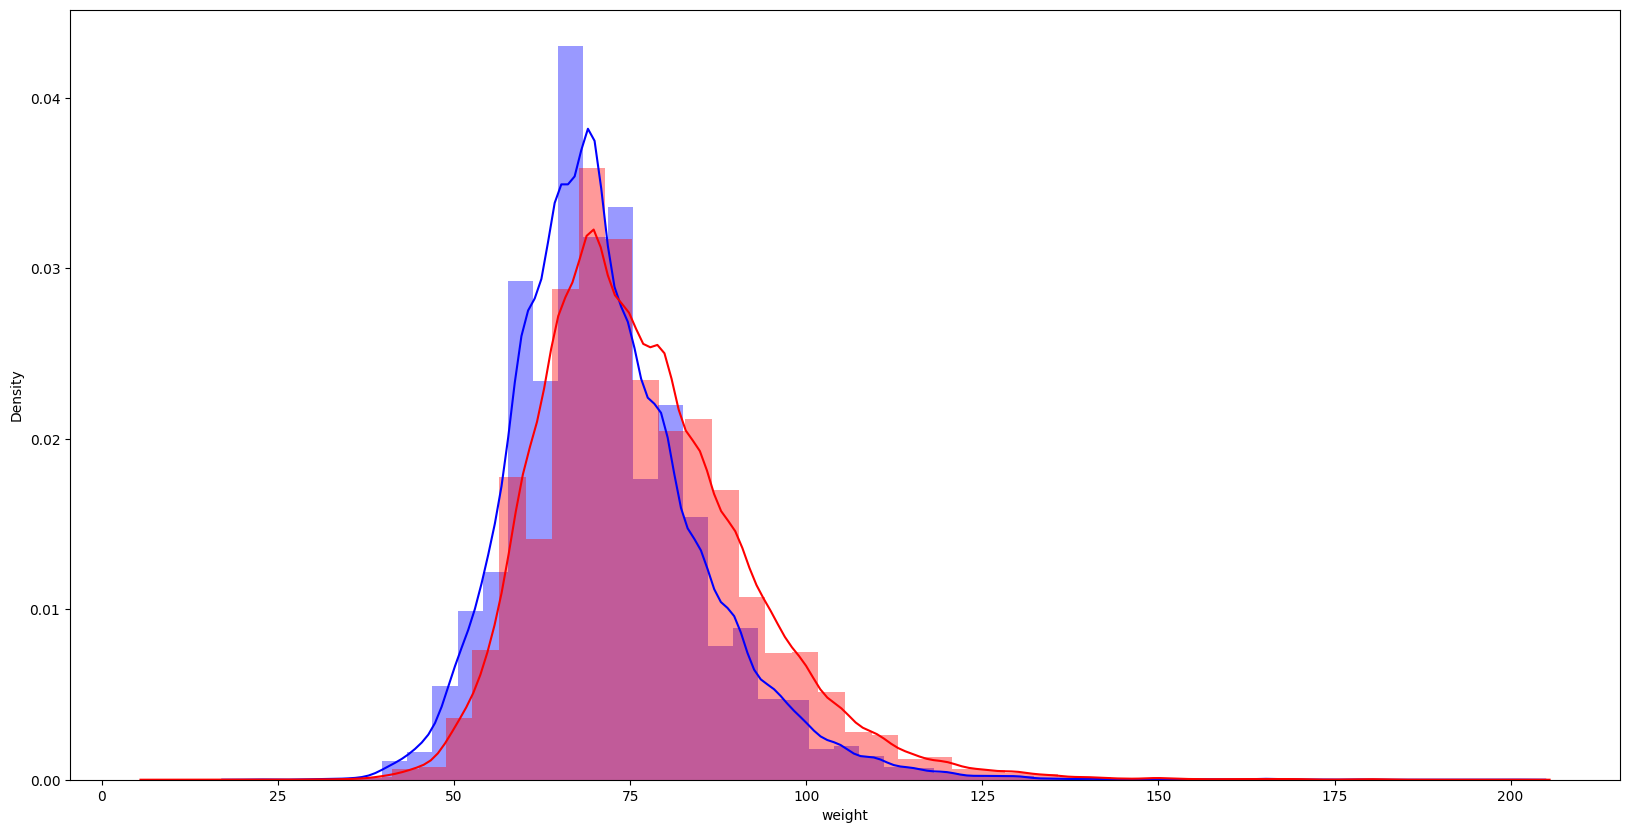

In [17]:
sns.distplot(df['weight'][df['cardio']==0],color='blue')
sns.distplot(df['weight'][df['cardio']==1],color='red')

可以看出在体重大于75kg后，患心血管疾病发病率增加，可知超重是患心血管疾病的危险因素

2.5 血压对心血管疾病的影响

<Axes: xlabel='ap_hi', ylabel='Density'>

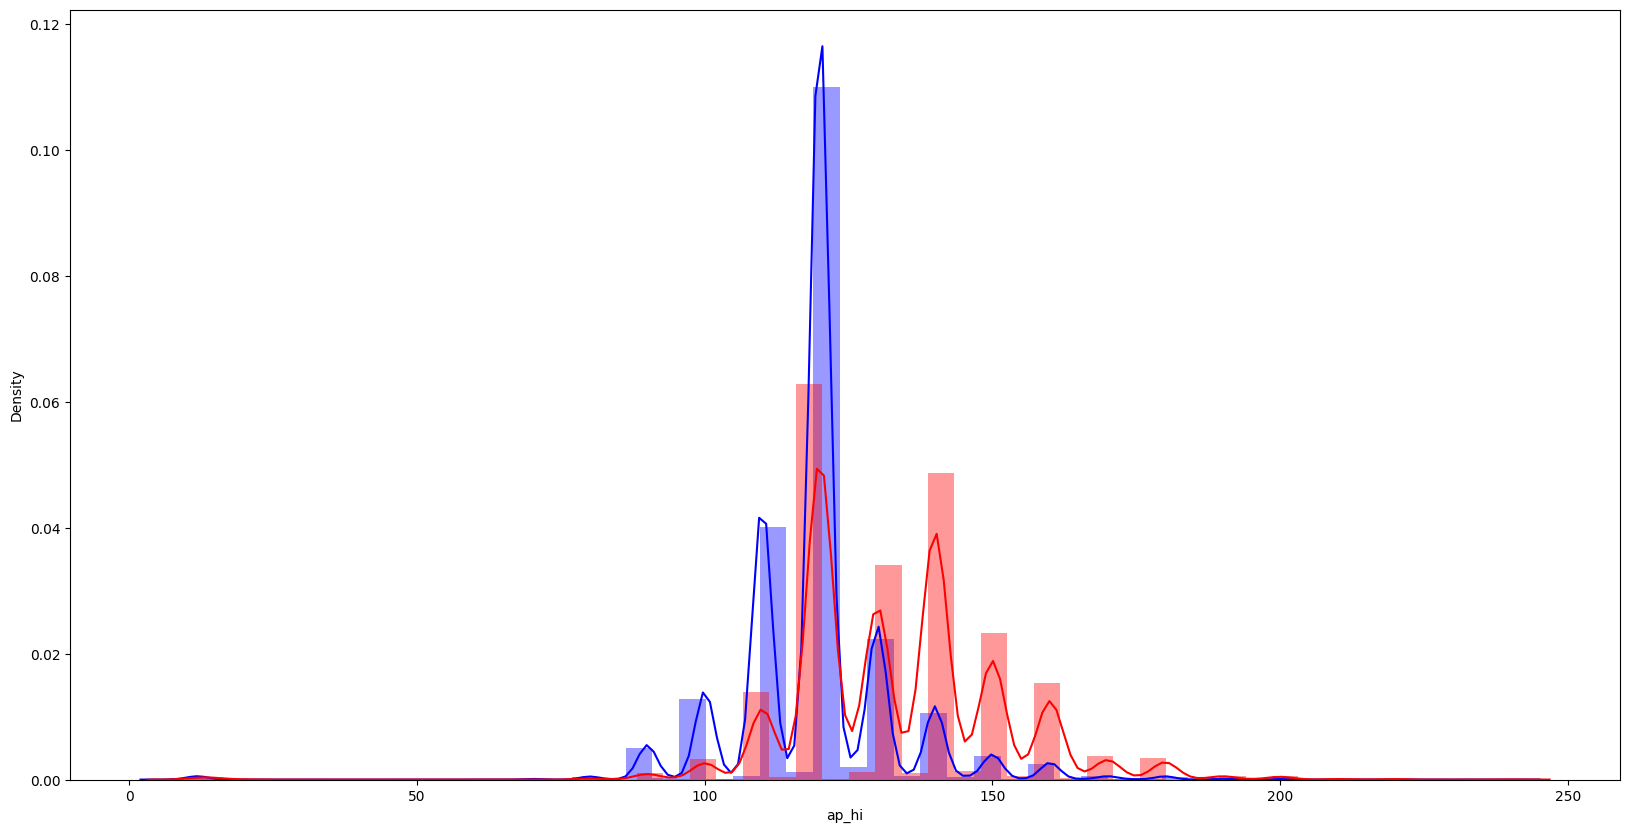

In [18]:
sns.distplot(df['ap_hi'][df['cardio']==0],color='blue')
sns.distplot(df['ap_hi'][df['cardio']==1],color='red')

可以看出收缩压在140以上时，患心血管疾病的发病率大大增加

<Axes: xlabel='ap_lo', ylabel='Density'>

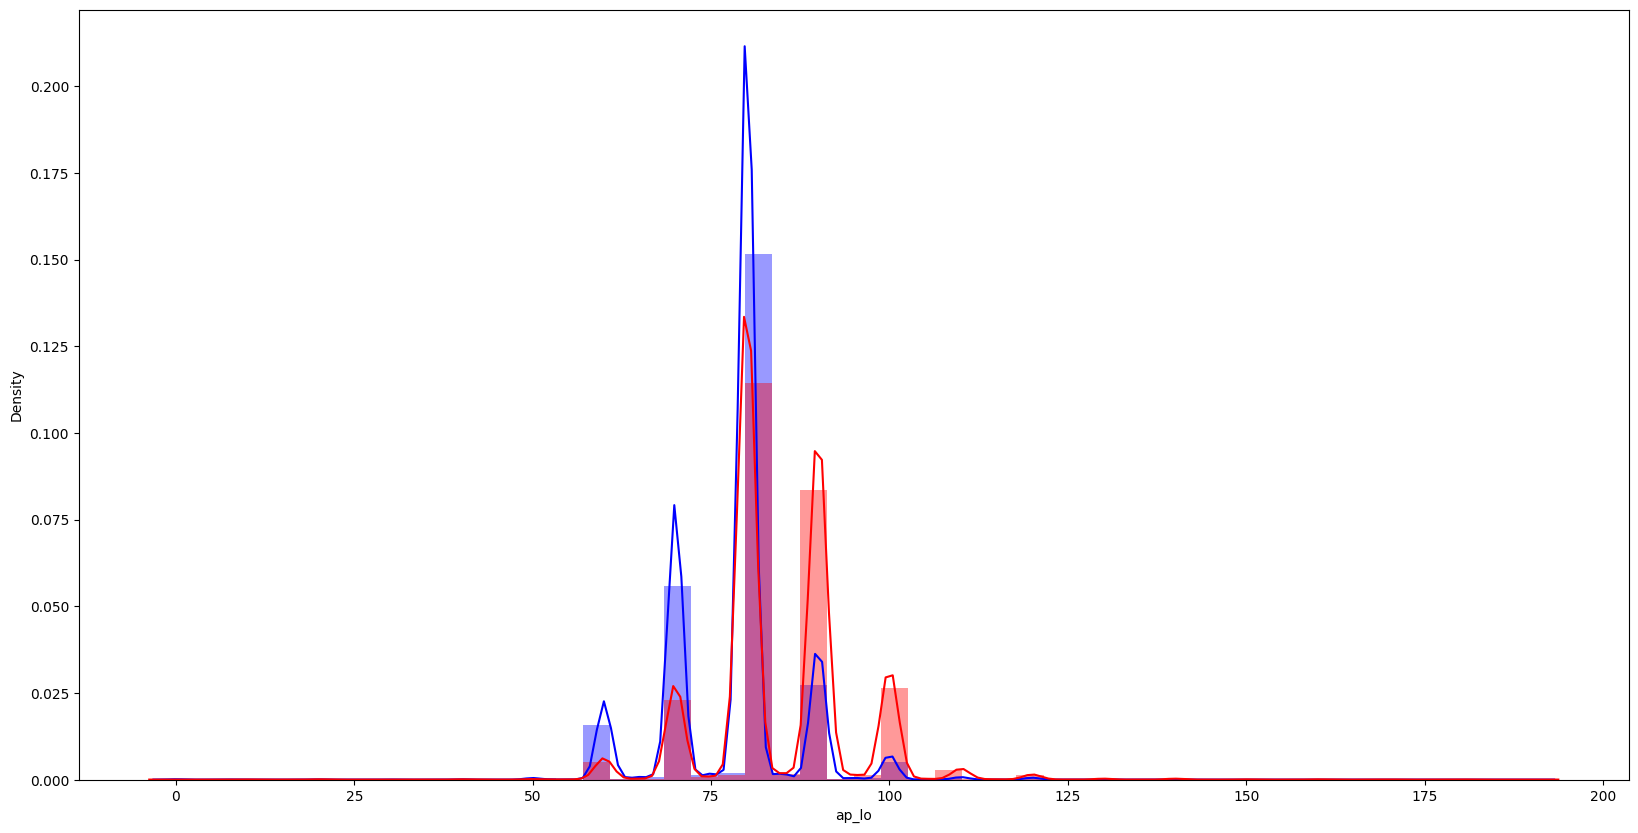

In [19]:
sns.distplot(df['ap_lo'][df['cardio']==0],color='blue')
sns.distplot(df['ap_lo'][df['cardio']==1],color='red')

可以看出舒张压在90以上时，患心血管疾病的发病率大大增加

以上结论可推出高血压是患心血管疾病的一个高危因素

2.6 胆固醇水平对心血管疾病的影响

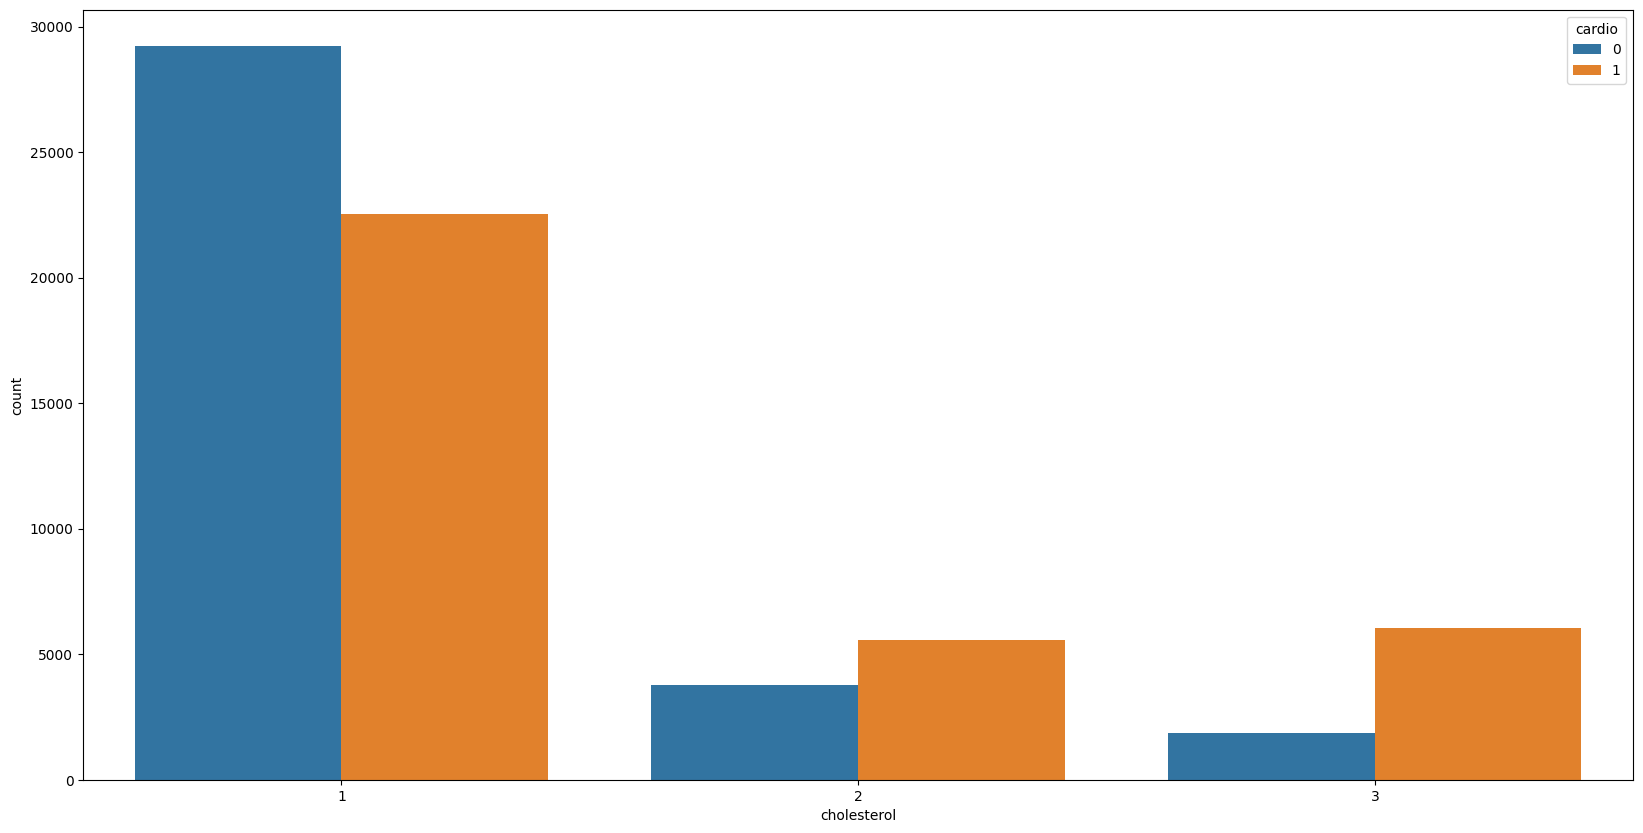

In [20]:
sns.countplot(x='cholesterol', hue='cardio', data = df);

可以看出正常水平的胆固醇下，患心血管疾病发病率小，随着胆固醇水平的升高，发病率越来越大

2.7 血糖水平对心血管疾病的影响

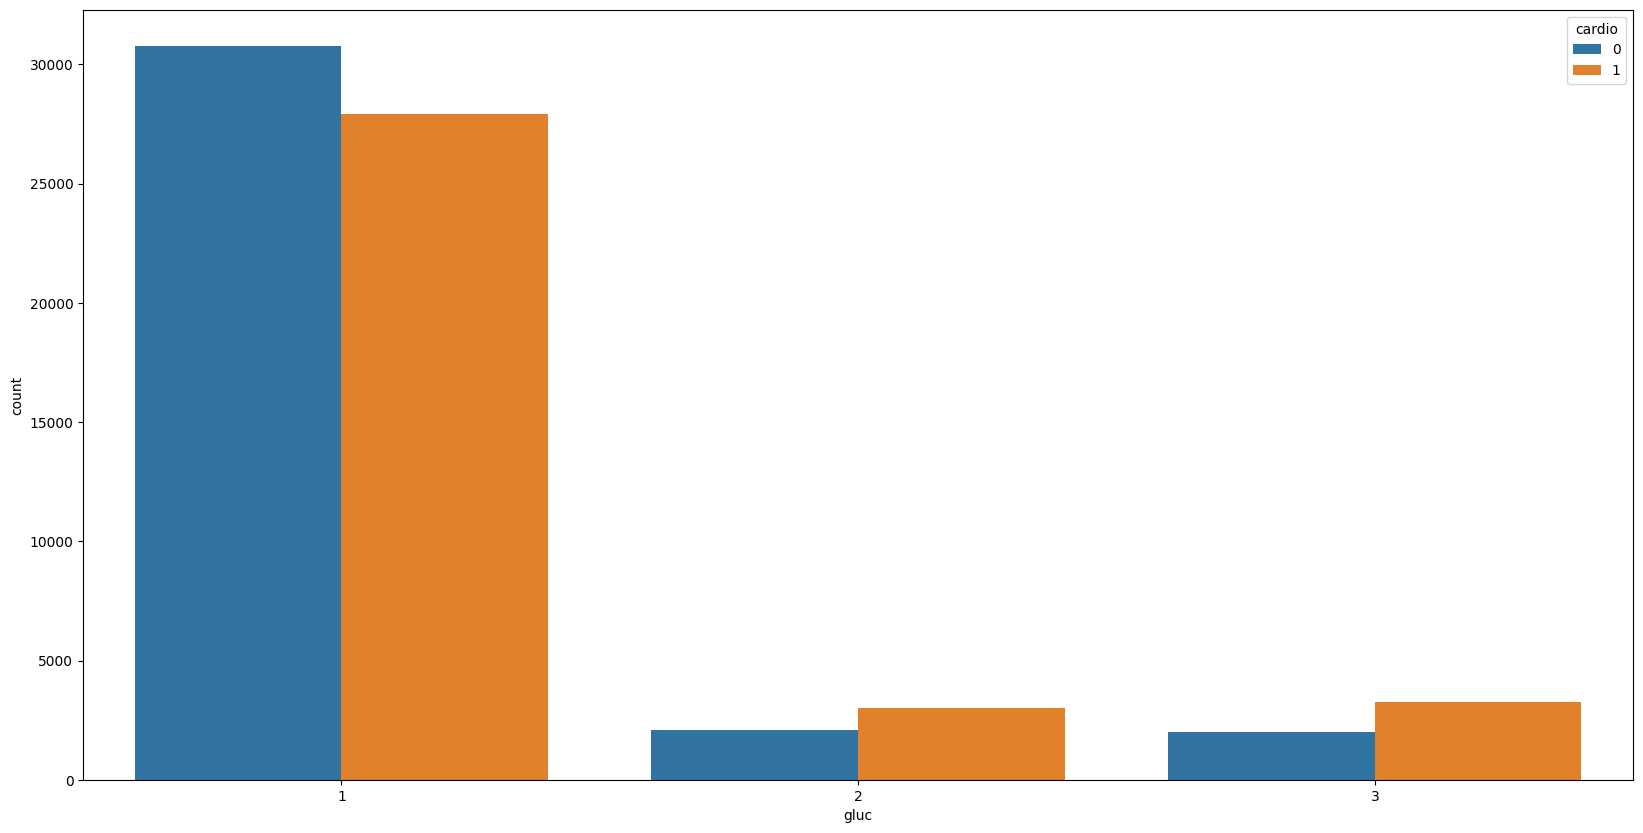

In [21]:
sns.countplot(x='gluc', hue='cardio', data = df);

与胆固醇水平类似，可以看出正常水平的血糖下，患心血管疾病发病率小，随着血糖水平的升高，发病率越来越大

2.8 抽烟对心血管疾病的影响

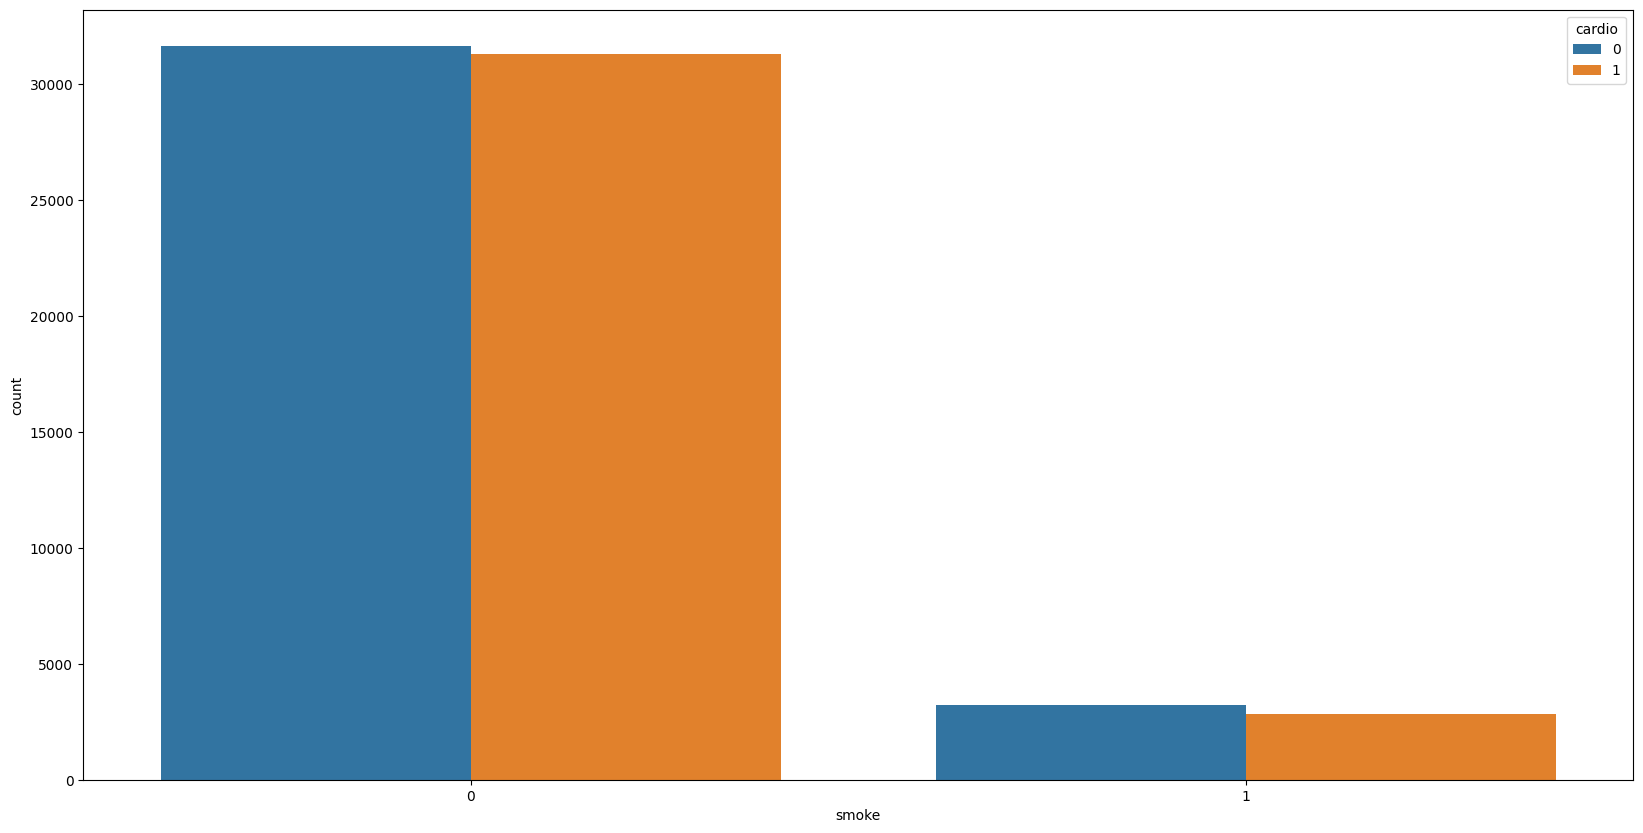

In [22]:
sns.countplot(x='smoke', hue='cardio', data = df);

可以看出抽烟似乎对心血管疾病的影响不大

2.9 喝酒对心血管疾病的影响

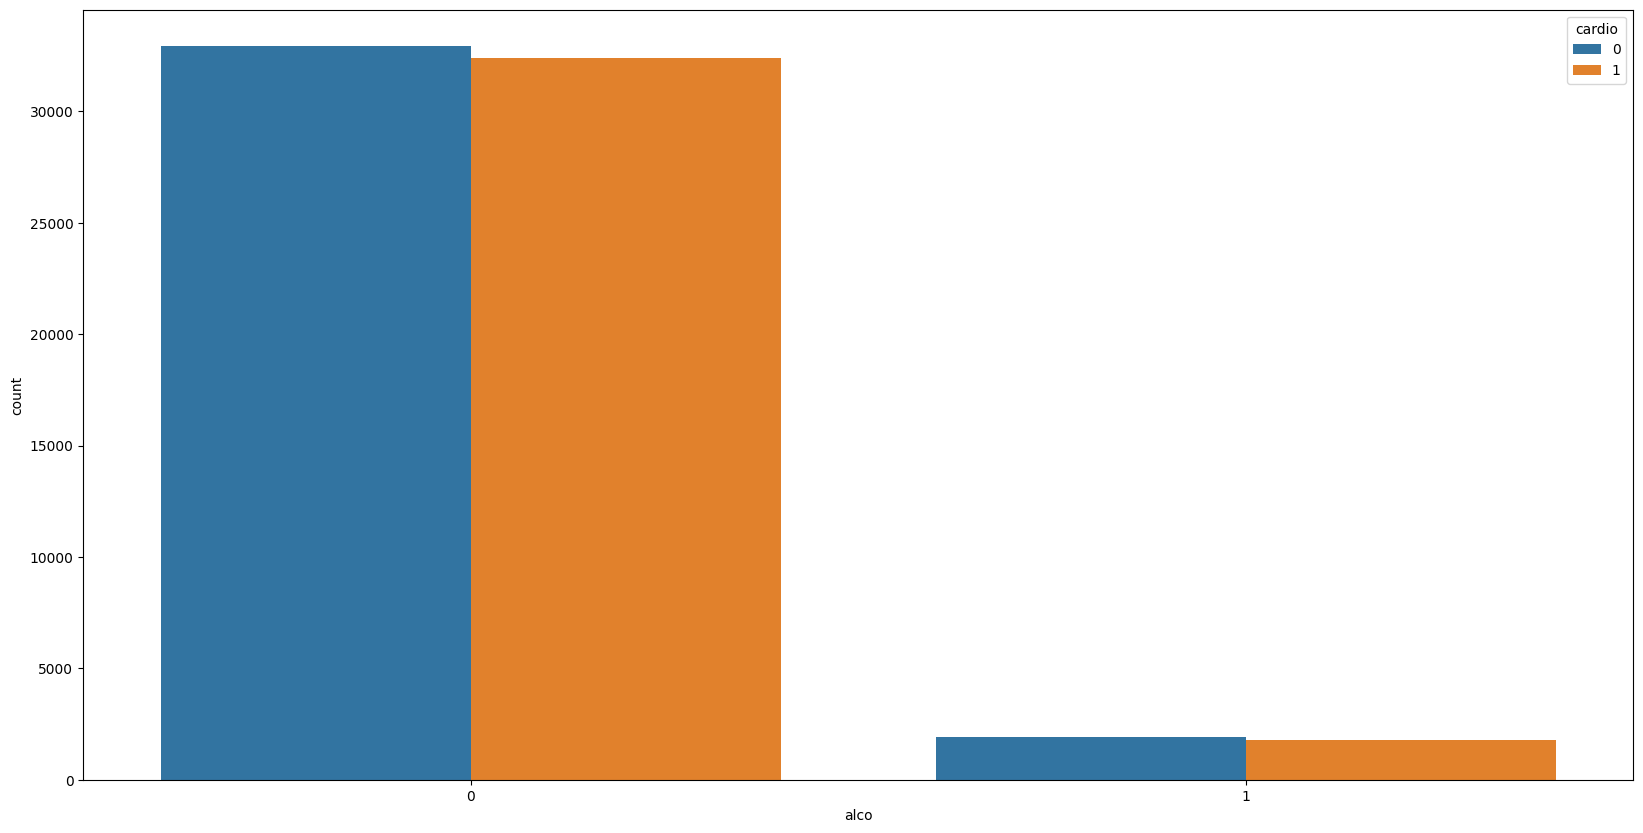

In [23]:
sns.countplot(x='alco', hue='cardio', data = df);

可以看出喝酒似乎对心血管疾病的影响也不大

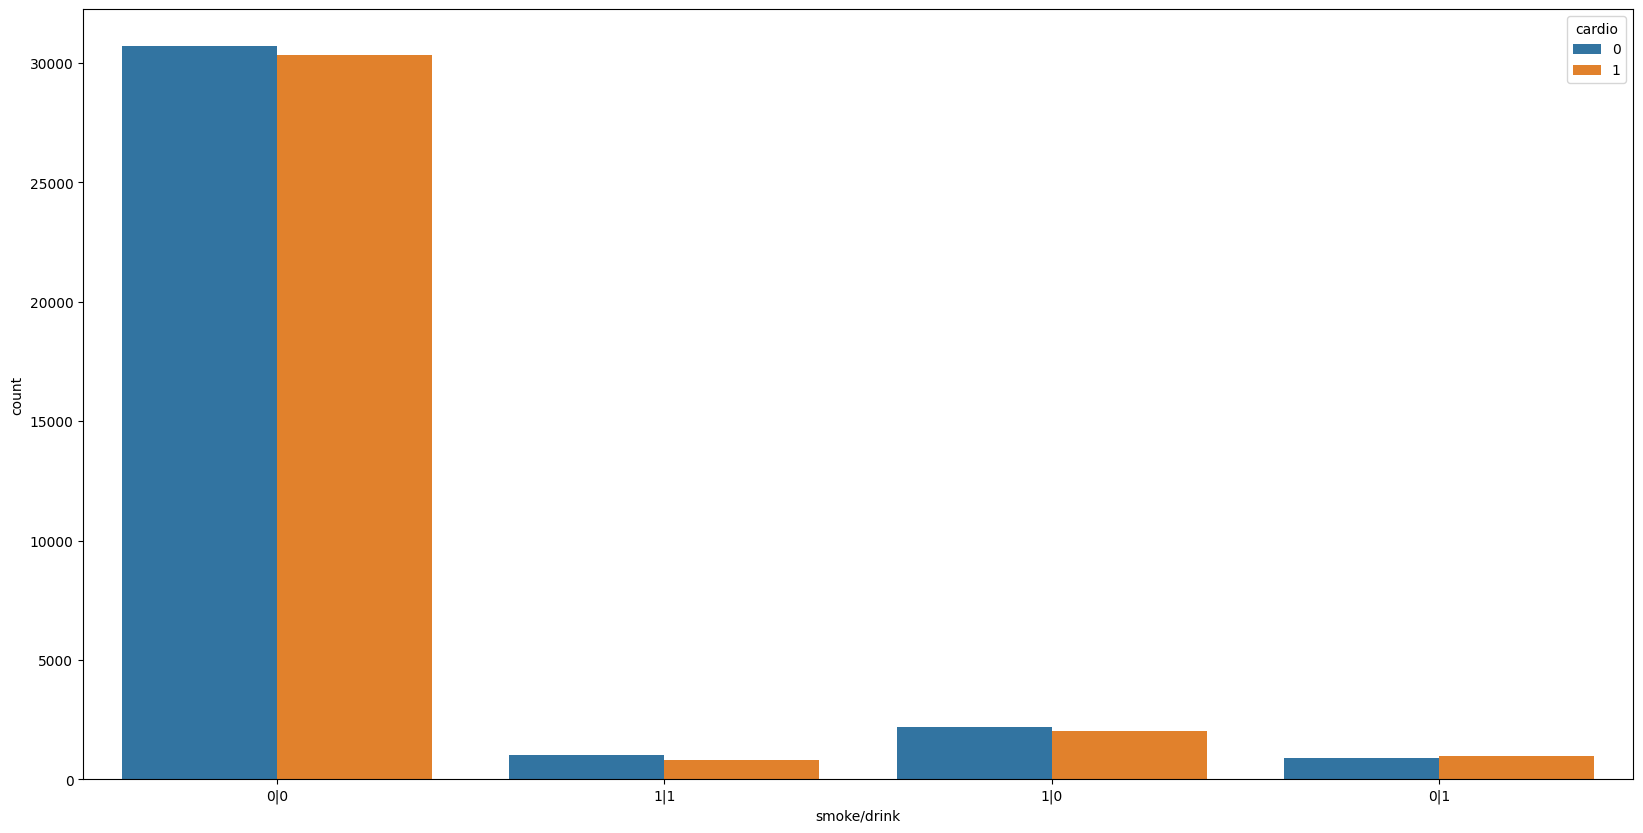

In [34]:
df['smoke/drink'] = df['smoke'].apply(str)+'|'+df['alco'].apply(str)
sns.countplot(x='smoke/drink', hue='cardio', data = df);

可以看到不抽烟但喝酒的人群似乎发病率最高。

2.10 运动对心血管疾病的影响

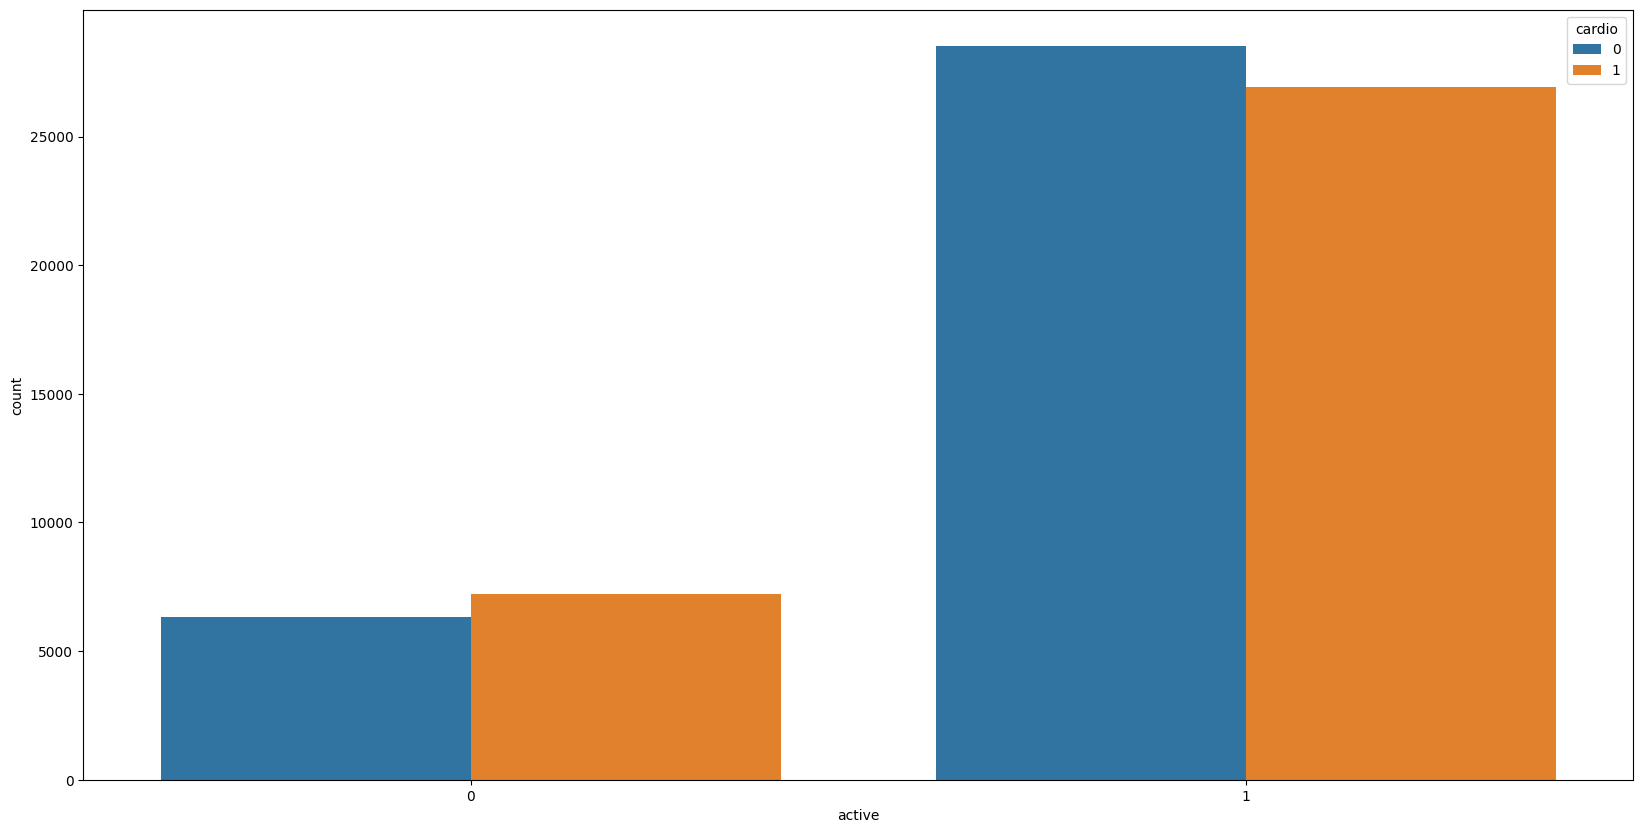

In [24]:
sns.countplot(x='active', hue='cardio', data = df);

可以看到运动人群的发病率要低于不运动人群。

3. 总结

影响心血管疾病发病率的关键因素有：高龄、超重、高血糖、高胆固醇水平、缺乏运动。